<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/Hyeon-Tae_Hwang/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,853 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
# drive mount
from google.colab import drive
drive.mount('/content/drive')

!mkdir covid
!cd '/content/covid'

!unzip -qq "/content/drive/MyDrive/ai/covid/코로나19.zip" -d '/content/covid' # 압축파일 경로

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
cases = pd.read_csv('/content/covid/서울시 코로나19 확진자 현황.csv')
area = pd.read_csv('/content/covid/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv')

In [17]:
print(cases.head())
print(cases.shape)
print(cases.columns)

     연번     확진일   환자번호  국적  환자정보   지역  여행력        접촉력  조치사항   상태 이동경로  \
0  5748  10.21.  25530 NaN   NaN  양천구  NaN   감염경로 조사중   NaN  NaN  NaN   
1  5747  10.21.  25528 NaN   NaN  강동구  NaN  강남서초 지인모임   NaN  NaN  NaN   
2  5746  10.21.  25525 NaN   NaN  강남구  NaN  기타 확진자 접촉   NaN  NaN  NaN   
3  5745  10.21.  25517 NaN   NaN  관악구  NaN   감염경로 조사중   NaN  NaN  NaN   
4  5744  10.21.  25504 NaN   NaN  관악구  NaN  기타 확진자 접촉   NaN  NaN  NaN   

                등록일               수정일 노출여부  
0  2020-10-22 10:58  2020-10-22 10:58    Y  
1  2020-10-22 10:58  2020-10-22 10:58    Y  
2  2020-10-22 10:58  2020-10-22 10:58    Y  
3  2020-10-22 10:58  2020-10-22 10:58    Y  
4  2020-10-22 10:58  2020-10-22 10:58    Y  
(5748, 14)
Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')


In [5]:
cases = pd.read_csv('/content/covid/서울시 코로나19 확진자 현황.csv', index_col=False,
                    dtype = {'환자번호':'category', '확진일':'category', '지역':'category', '여행력':'category', '접촉력':'category', '상태':'category' }
                    )

In [17]:
cases.여행력.value_counts().head(25)

미국        153
영국         50
필리핀        25
인도         13
우즈베키스탄     13
프랑스        13
스페인        12
일본         10
카자흐스탄      10
이라크        10
인도네시아       7
멕시코         7
태국          6
키르기스스탄      6
캐나다         5
브라질         5
러시아         5
체코          5
중국 우한시      4
파키스탄        4
폴란드         4
이탈리아        4
독일          4
UAE         3
터키          3
Name: 여행력, dtype: int64

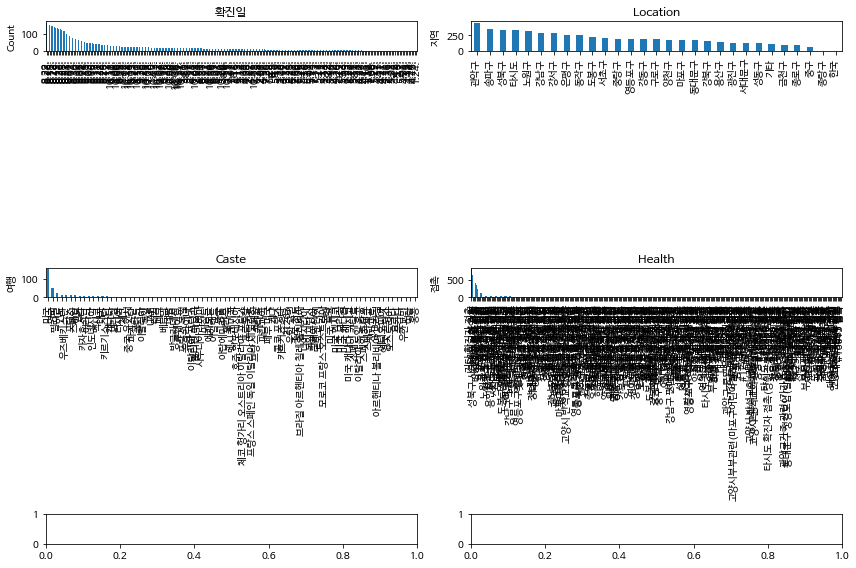

In [6]:
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] ='Malgun Gothic'
#plt.rcParams['axes.unicode_minus'] =False
plt.rc('font', family='')

f, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,8))

cases.확진일.value_counts().head(25).plot(kind='bar',ax=ax[0, 0])
ax[0,0].set_ylabel('Count')
ax[0,0].set_title('확진일')

 
cases.지역.value_counts().plot(kind='bar', ax=ax[0, 1])
ax[0,1].set_title('Location')
ax[0,1].set_ylabel('지역')

cases.여행력.value_counts().plot(kind='bar', ax=ax[1, 0])
ax[1,0].set_title('Caste')
ax[1,0].set_ylabel('여행')

#health
cases.접촉력.value_counts().plot(kind='bar', ax=ax[1,1])
ax[1,1].set_title('Health')
ax[1,1].set_ylabel('접촉')

f.subplots_adjust(hspace=0.7)
f.tight_layout()
plt.show()


In [22]:
cases['여행력'].value_counts()

미국                      153
영국                       50
필리핀                      25
인도                       13
프랑스                      13
                       ... 
프랑스 스페인 독일 이탈리아 네덜란드      1
호주 인도네시아                  1
포르투칼                      1
미국 캐나다 멕시코                1
우한 교민                     1
Name: 여행력, Length: 82, dtype: int64

In [16]:
cases['여행력'].unique()

numpy.ndarray

In [13]:
cases['지역'].value_counts()

관악구     452
송파구     361
성북구     344
타시도     331
노원구     323
강남구     296
강서구     295
은평구     259
동작구     254
도봉구     223
서초구     210
중랑구     201
영등포구    200
강동구     199
구로구     193
양천구     186
마포구     180
동대문구    172
강북구     156
용산구     140
광진구     136
서대문구    135
성동구     130
기타      116
금천구      96
종로구      94
중구       64
종랑구       1
한국        1
Name: 지역, dtype: int64

In [11]:
print(area.head())
print(area.shape)

   순번  시군구코드 시군구명_한글        시군구명_영문  ESRI_PK         위도          경도
0   1  11320     도봉구      Dobong-gu        0  37.665861  127.031767
1   2  11380     은평구   Eunpyeong-gu        1  37.617612  126.922700
2   3  11230    동대문구  Dongdaemun-gu        2  37.583801  127.050700
3   4  11590     동작구     Dongjak-gu        3  37.496504  126.944307
4   5  11545     금천구   Geumcheon-gu        4  37.460097  126.900155
(25, 7)


지도 시각화